In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List
import random

In [4]:
class AgentState(TypedDict):
    name: str
    numbers: List[int]
    countor: int

In [5]:
def greeting(state: AgentState) -> AgentState:
    """Greets the user by name and initializes the countor."""
    print(f"Hello, {state['name']}!")
    state['countor'] = 0
    return state

def random_number(state: AgentState) -> AgentState:
    """Generates a random number and appends it to the numbers list."""
    number = random.randint(1, 100)
    state['numbers'].append(number)
    state['countor'] += 1
    return state

def should_continue(state: AgentState) -> str:
    """Determines whether to continue generating numbers."""
    if state['countor'] < 5:
        print(f"Generated number {state['countor']}: {state['numbers'][-1]}")
        return 'loop'
    else:
        return 'end'

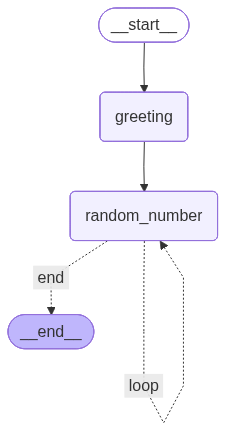

In [6]:
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting)
graph.add_node("random_number", random_number)

graph.add_edge("greeting", "random_number")

graph.add_conditional_edges(
    "random_number",
    should_continue,
    {
        'loop': "random_number",
        'end': END
    },
)

graph.set_entry_point("greeting")

app = graph.compile()
app 

In [8]:
app.invoke(AgentState(name="Alice",numbers=[]))

Hello, Alice!
Generated number 1: 80
Generated number 2: 32
Generated number 3: 27
Generated number 4: 33


{'name': 'Alice', 'numbers': [80, 32, 27, 33, 41], 'countor': 5}